# Module 7: Deep Learning and Image Recognition

For this exercise we will be using tensorflow. Tensorflow is a tensor computation framework. The Keras library is build on top of tensorflow to provide a much more user friendly interface.

Finally, to illustrate the ease of use of pretrained deep learning models, we will apply the fastai library on medical data.

## **Setup**
First install the necessary libraries.

In [1]:
import sys
!{sys.executable} -m pip install tensorflow tensorflow-datasets pydicom kornia opencv-python scikit-image pyarrow

You should consider upgrading via the '/home/nuls/.local/share/virtualenvs/bi_deep_learning-M-dGzlNK/bin/python -m pip install --upgrade pip' command.


In [2]:
# Import Keras and Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2021-09-13 08:16:26.821218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-13 08:16:26.821302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### **Datasets**
Download the datasets, which might take a while.

In [3]:
# This code block downloads the cats vs. dogs dataset

import tensorflow_datasets as tfds

# Load the cats vs. dogs dataset
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:20%]", "train[20%:30%]", "train[30%:40%]"],
    as_supervised=True,  # Include labels
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: 4652
Number of validation samples: 2327
Number of test samples: 2326


2021-09-13 08:16:30.932799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-13 08:16:30.932835: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-13 08:16:30.932850: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CE43859): /proc/driver/nvidia/version does not exist
2021-09-13 08:16:30.933495: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# This code loads the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

### **Exercise 7.1: Densely connected Neural Networks**

Use the sequential model from keras to build a Neural Network with only densely connected layers.
The model should be trained on the MNIST dataset and is finally evaluated on the test set.

In [5]:
# Build a really simple densely connected neural network
model = keras.Sequential(
    [
        layers.Input(shape=(784), name='digits'),
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(64, activation="relu", name="layer2"),
        layers.Dense(10, name="layer3", activation="softmax"),
    ]
)

In [6]:
# look at the model with
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer3 (Dense)               (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Next we have to compile our model
# Choose an optimizer, a loss function and a metric to monitor
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [8]:
# Fit the model on the data
# Tip: Keep the number of epochs low, to reduce the runtime (e.g.: 2-4 epochs should suffice for a reasonable result)
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

2021-09-13 08:16:31.756218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.1768 - val_sparse_categorical_accuracy: 0.9499
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.1603 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.1350 - val_sparse_categorical_accuracy: 0.9612


In [9]:
# Look at the history with
history.history

{'loss': [0.3387201130390167, 0.16029071807861328],
 'sparse_categorical_accuracy': [0.9039400219917297, 0.9524199962615967],
 'val_loss': [0.1767648607492447, 0.1349605768918991],
 'val_sparse_categorical_accuracy': [0.9498999714851379, 0.9611999988555908]}

In [10]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
# What is the best performance you were able to achieve?
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 1ms/step - loss: 0.1312 - sparse_categorical_accuracy: 0.9630
test loss, test acc: [0.13119977712631226, 0.9629999995231628]


In [11]:
# We can also generate predictions on samples
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
print('Prediction 1: ', predictions[0])
print('Prediction 2: ', predictions[1])
print('Prediction 3: ', predictions[2])

Generate predictions for 3 samples
predictions shape: (3, 10)
Prediction 1:  [5.0205217e-06 1.0937511e-07 1.2573181e-04 1.9596420e-04 6.1456560e-09
 5.3790853e-05 9.0695944e-11 9.9959761e-01 3.2137066e-06 1.8563402e-05]
Prediction 2:  [5.9325566e-07 5.3218009e-05 9.9931109e-01 4.4511899e-04 8.2902254e-08
 7.7009072e-06 3.1729369e-06 6.2454547e-10 1.7896891e-04 3.9494083e-10]
Prediction 3:  [1.3678774e-05 9.9643940e-01 6.8819849e-04 1.0071183e-04 2.1080984e-04
 3.4086104e-04 6.2679916e-05 7.7263266e-04 1.2720950e-03 9.8866229e-05]


### **Exercise 7.2: Convolutional Neural Networks**

This time build a Convoluational Neural Network on the same MNIST dataset. Compare the test accuracy, training time and number of parameters between the two models. Which architecture would you use for the MNIST dataset?

In [12]:
# The data needs to be 3D (pixel_height, pixel_width, color_channels/dimensions)
# That's why we run the code again
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [13]:
# Build a Convolutional model
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))  # 28x28 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
# To add classification layer we first need to create a one dimensional feature vector
model.add(layers.GlobalMaxPooling2D())
# Finally, we add a classification layer.
model.add(layers.Dense(10))

In [14]:
# Look at the number of parameters with
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Again, compile the model
# Choose an appropriate optimizer, loss function and metric to monitor
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [16]:
# Fit the model on the data
# Tip: Again, limit the number of epoch the algorithms runs to make it comparable to the previous experiment
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Epoch 1/2
782/782 [==============================] - 6s 7ms/step - loss: 0.7509 - sparse_categorical_accuracy: 0.7862 - val_loss: 0.3537 - val_sparse_categorical_accuracy: 0.8898
Epoch 2/2
782/782 [==============================] - 8s 10ms/step - loss: 0.2641 - sparse_categorical_accuracy: 0.9191 - val_loss: 0.2736 - val_sparse_categorical_accuracy: 0.9100


### **Exercise 7.3: Transferlearning**

For this exercise we will try to build a dog vs. cat predictor. Since the problem is much more complex than the previous one, we want to use a pre-trained image classification model.

Use the pre-trained ResNet-50 model and add a new top layer to classify only dogs and cats. Train the model for a couple of epochs and evaluate it on the test set.

### **Preprocessing**

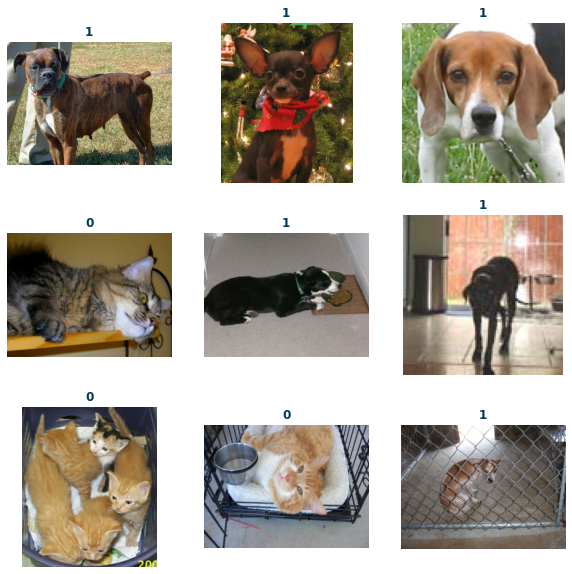

In [17]:
import matplotlib.pyplot as plt

# Plot a couple of the images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [18]:
# Standardization
# Rescale and fix the image size to 150,150
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [19]:
# Add caching and pre-loading for speedup
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [22]:
# Use the pretrained ResNet-50 as a base_model
base_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(150, 150, 3)
)

# Freeze the base model, by setting base_model to not trainable
base_model.trainable = False


In [23]:
# Create a new input layer for our new dataset
inputs = keras.Input(shape=(150, 150, 3))

# Add data augmentation
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)
x = data_augmentation(inputs)

# Rescale color values of 0..255 to range of -1..+1
scale_layer = layers.Rescaling(scale=1/127.5, offset=-1)
ax = scale_layer(x)

# Put ResNet into inference mode
x = base_model(x, training=False)
# Add dropout to the final layer
x = keras.layers.Dropout(0.2)(x)

# Add another Dense layer on top of the base model
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [24]:
# Print the layers with
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [25]:
# Train the top layer
# Choose an appropriate optimizer, loss and monitoring metric

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [26]:
# Fit the model
epochs = 2
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/2
 80/146 [===============>..............] - ETA: 1:01 - loss: 0.3207 - binary_accuracy: 0.8566

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


146/146 [==============================] - 212s 1s/step - loss: 0.2718 - binary_accuracy: 0.8788 - val_loss: 0.1380 - val_binary_accuracy: 0.9433
Epoch 2/2
146/146 [==============================] - 206s 1s/step - loss: 0.1766 - binary_accuracy: 0.9228 - val_loss: 0.1293 - val_binary_accuracy: 0.9471


In [27]:
# Evaluate the model on the test set
results = model.evaluate(test_ds, batch_size=128)

55/73 [=====================>........] - ETA: 17s - loss: 0.1008 - binary_accuracy: 0.9545

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


59/73 [=======================>......] - ETA: 13s - loss: 0.1009 - binary_accuracy: 0.9555

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


60/73 [=======================>......] - ETA: 12s - loss: 0.1010 - binary_accuracy: 0.9557

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


73/73 [==============================] - 72s 974ms/step - loss: 0.0958 - binary_accuracy: 0.9587


In [28]:
# Finetuning
# Unfreeze the base model, but training=False ensures that the batch normalization layers aren't changed
base_model.trainable=True
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [29]:
# Recompile the model
# Use a really small learning rate for finetuning
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [ ]:
epochs = 2
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [ ]:
results = model.evaluate(test_ds, batch_size=128)

17/73 [=====>........................] - ETA: 53s - loss: 0.0671 - binary_accuracy: 0.9706

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


73/73 [==============================] - 71s 965ms/step - loss: 0.0717 - binary_accuracy: 0.9742


## **Bonus Exercise 7.4: Doing it the fast way**

In this exercise we use the fastai library to quickly finetune a pre-trained model.

In [31]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom

import pandas as pd

In [32]:
# Downloads the DICOM files
pneumothorax_source = untar_data(URLs.SIIM_SMALL)

In [33]:
# Create a train and validation split
items = get_dicom_files(pneumothorax_source/f"train/")
trn,val = RandomSplitter()(items)

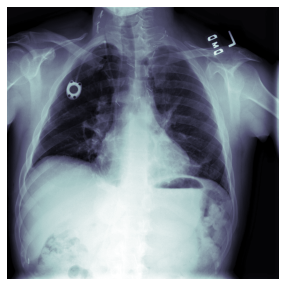

In [34]:
# We can look at a sample
patient = 7
xray_sample = items[patient].dcmread()
xray_sample.show()

In [35]:
# Read in the label information
df = pd.read_csv(pneumothorax_source/f"labels.csv")
df.head()

,file,label
0,train/No Pneumothorax/000000.dcm,No Pneumothorax
1,train/Pneumothorax/000001.dcm,Pneumothorax
2,train/No Pneumothorax/000002.dcm,No Pneumothorax
3,train/Pneumothorax/000003.dcm,Pneumothorax
4,train/Pneumothorax/000004.dcm,Pneumothorax


In [36]:
# Put the training in a DataBlock
# That is later used as a data source for training
pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
                   get_x=lambda x:pneumothorax_source/f"{x[0]}",
                   get_y=lambda x:x[1],
                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

dls = pneumothorax.dataloaders(df.values, num_workers=0)

/home/nuls/.local/share/virtualenvs/bi_deep_learning-M-dGzlNK/lib/python3.8/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


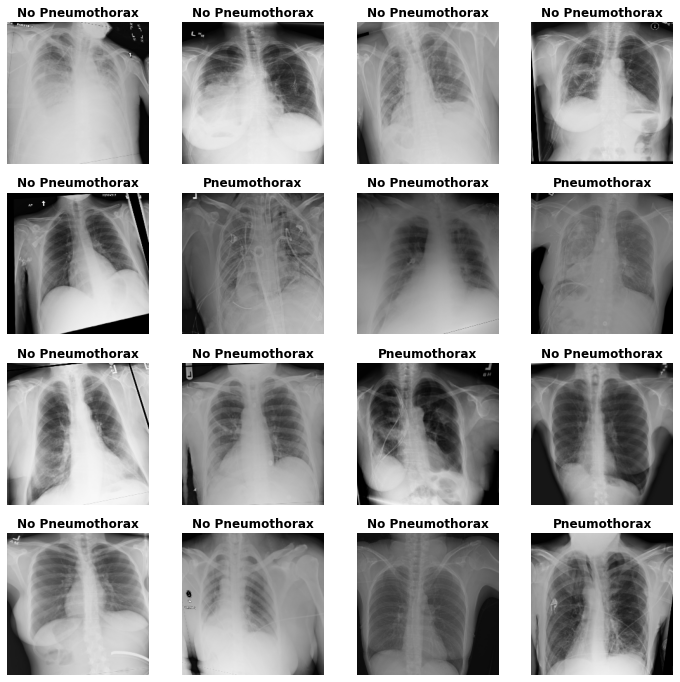

In [37]:
# We can plot the first Batch of 16 images
dls = pneumothorax.dataloaders(df.values)
dls.show_batch(max_n=16)

In [38]:
# Create the model
# For fastai you don't need to specify a loss function or optimizer
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/home/nuls/.local/share/virtualenvs/bi_deep_learning-M-dGzlNK/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [39]:
# The loss function was chosen based on the dataset
# You can have a look at it with
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [40]:
# The optimzer was chosen based on the dataset
# You can have a look at it with
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

/home/nuls/.local/share/virtualenvs/bi_deep_learning-M-dGzlNK/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0020892962347716093)

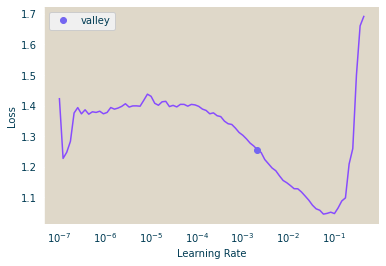

In [41]:
# Find the best learning rate
learn.lr_find()

In [42]:
# Finetune the model
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.362609,1.127156,0.440000,00:40


In [43]:
# Perform a single prediction
learn.predict(pneumothorax_source/f"train/Pneumothorax/000004.dcm")

('No Pneumothorax', tensor(0), tensor([0.8616, 0.1384]))

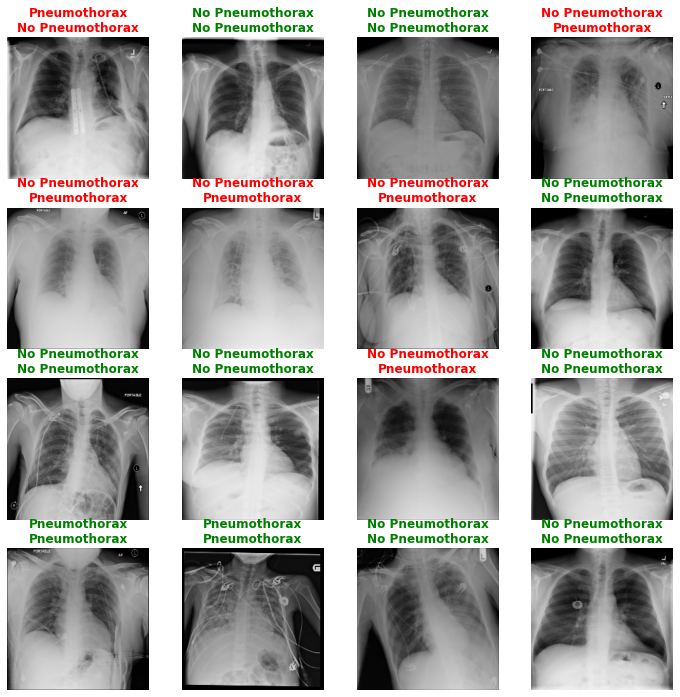

In [44]:
# Show the result of a single batch
learn.show_results(max_n=16)

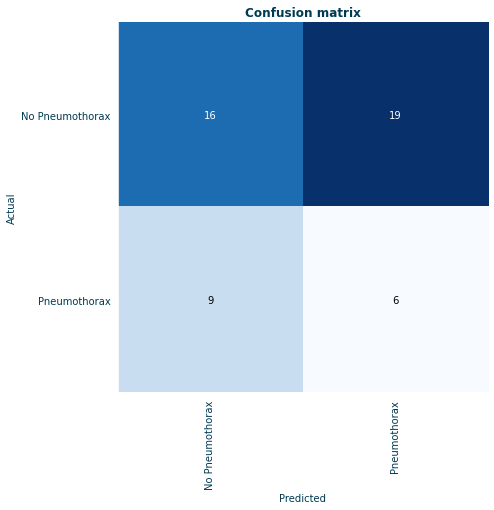

In [45]:
# Evaluate the performance with the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7))

In [46]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

16 19 9 6


In [47]:
# Calculate the sensitivity
sensitivity = tp/(tp + fn)
sensitivity

0.4

In [48]:
# Calculate the specificity
specificity = tn/(fp + tn)
specificity

0.45714285714285713

In [50]:
# Calculate the accuracy
accuracy = (tp+tn)/(tn+tp+fp+fn)
accuracy

0.44

**This is model considered good? How can we improve the model?**